version list : ['m1_t1_1']

version : m1_t1_1

INFO | 2019.01.19 - 22h:58m:12s
INFO | main.py --gpu 2 --version m1_t1_1 --shuffle True --batch_size 32 --num_epoch 100 --lr 0.00013
INFO |  -------------------- setting --------------------
INFO |     version : m1_t1_1
INFO |     model save path : saved_model/
INFO |     gpu : 2
INFO |     number of epochs : 100
INFO |     batch size : 32
INFO |     learning rate : 0.00013
INFO |     data path : dataset/


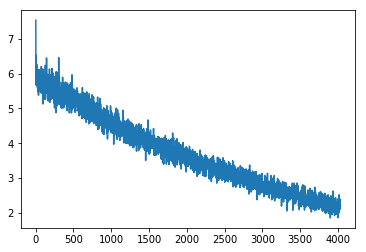

INFO |  ------- model training start -------
INFO |     epoch 1/100 done | avg.loss : 5.83110
INFO |     epoch 2/100 done | avg.loss : 5.65939
INFO |     epoch 3/100 done | avg.loss : 5.59329
INFO |     epoch 4/100 done | avg.loss : 5.51360
INFO |     epoch 5/100 done | avg.loss : 5.41182
INFO |     epoch 6/100 done | avg.loss : 5.33206
INFO |     epoch 7/100 done | avg.loss : 5.24849
INFO |     epoch 8/100 done | avg.loss : 5.14864
INFO |     epoch 9/100 done | avg.loss : 5.03880
INFO |     epoch 10/100 done | avg.loss : 4.93548
INFO |     epoch 11/100 done | avg.loss : 4.81843
INFO |     epoch 12/100 done | avg.loss : 4.69631
INFO |     epoch 13/100 done | avg.loss : 4.59924
INFO |     epoch 14/100 done | avg.loss : 4.49668
INFO |     epoch 15/100 done | avg.loss : 4.40132
INFO |     epoch 16/100 done | avg.loss : 4.31902
INFO |     epoch 17/100 done | avg.loss : 4.22763
INFO |     epoch 18/100 done | avg.loss : 4.15418
INFO |     epoch 19/100 done | avg.loss : 4.08603
INFO |     epo

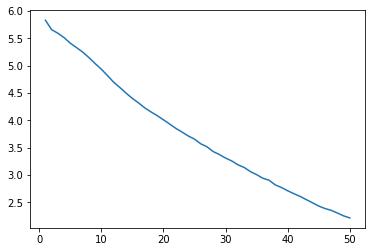

In [262]:
import os
versions = os.listdir('log')
for i, item in enumerate(versions):
    versions[i] = item[:-4]

version = versions[-1]
print('version list : {}'.format(versions))
print()
print('version : {}'.format(version))
print()

%matplotlib inline
import matplotlib.pyplot as plt
path = 'log/'+version+'.log'
with open(path,'r') as f:
    lines = f.readlines()
tmp=0
for i, line in enumerate(lines):
    if 'setting' in line :
        tmp+=1
    if tmp==2:
        idx=i+1
        break
    if line.strip() == 'INFO |':
        pass
    else:
        print(line.strip())

xs = []
ys = []
flag = 0

j=1
for i,line in enumerate(lines):
    if i<idx:
        continue
    if 'DEBUG' not in line:
        continue
    if 'completed' in line :
        break
    xs.append(j)
    ys.append(float(line.split()[-1]))
    j+=1
        
#plt.scatter(xs,ys)
plt.plot(xs,ys)
plt.show()

for i,line in enumerate(lines):
    if '------- model training start -------' in line:
        print(line.strip())
    if 'done' in line:
        print(line.strip())
    if 'completed' in line:
        print(line.strip())
        
xs = []
ys = []

j=1
for i, line in enumerate(lines):
    if 'done' in line:
        xs.append(j)
        ys.append(float(line.split()[-1]))
        j+=1
        
plt.plot(xs,ys)
plt.show()


In [129]:
import json
json_path='dataset/data.json'
json_data = json.loads(open(json_path).read())

In [130]:
json_data['class']

{'w_f48451c': 0,
 'w_c3d896a': 1,
 'w_20df2c5': 2,
 'new_whale': 3,
 'w_dd88965': 4,
 'w_64404ac': 5,
 'w_a6f9d33': 6,
 'w_581ba42': 7,
 'w_cb622a2': 8,
 'w_d3b46e7': 9,
 'w_8cad422': 10,
 'w_13ae3d4': 11,
 'w_3de579a': 12,
 'w_1d0830e': 13,
 'w_2ba6978': 14,
 'w_8dddbee': 15,
 'w_2365d55': 16,
 'w_3879fa0': 17,
 'w_9c506f6': 18,
 'w_8a6a8d5': 19,
 'w_662530e': 20,
 'w_a8b34a0': 21,
 'w_c0d11da': 22,
 'w_50e8d58': 23,
 'w_3881f28': 24,
 'w_9ad3551': 25,
 'w_cee684e': 26,
 'w_41d24c6': 27,
 'w_8a235b6': 28,
 'w_2e231f4': 29,
 'w_6822dbc': 30,
 'w_df86a42': 31,
 'w_700ebb4': 32,
 'w_d892cd9': 33,
 'w_7a4b2f9': 34,
 'w_bc285a6': 35,
 'w_c70fbcd': 36,
 'w_778e474': 37,
 'w_f3252ff': 38,
 'w_2df85e7': 39,
 'w_c7cda47': 40,
 'w_62bb54b': 41,
 'w_c6c89db': 42,
 'w_1531bf5': 43,
 'w_4e1e04d': 44,
 'w_d6ca28d': 45,
 'w_1260eb5': 46,
 'w_fccccec': 47,
 'w_acd217a': 48,
 'w_5650932': 49,
 'w_c98aaad': 50,
 'w_dd944b7': 51,
 'w_6f0cbe3': 52,
 'w_6cfa650': 53,
 'w_6e209a8': 54,
 'w_1ea5d96': 55,
 '

In [131]:
len(json_data['train'])

5005

In [259]:
import pandas as pd
import os 
from pprint import pprint

submissions = os.listdir('submission')

a=[]
for item in submissions: 
    submission = 'submission/'+item
    submission_data = pd.read_csv(submission)

    i=0
    for item in submission_data['Id']:
        if item[:3] == 'new':
            pass
        else:
            i+=1
    a.append(i)

pprint(list(zip(submissions,a)))

[('m1_t1_1-10.csv', 63),
 ('m1_t1_1-40.csv', 1495),
 ('m1_t1_1-20.csv', 513),
 ('m1_t1_1-0.csv', 0),
 ('m1_t1_1-30.csv', 886)]


In [258]:
import pandas as pd
import os 

n=-1

submissions = os.listdir('submission')
submission = 'submission/'+submissions[n]
submission_data = pd.read_csv(submission)

print(submissions)

['m1_t1_1-10.csv', 'm1_t1_1-40.csv', 'm1_t1_1-20.csv', 'm1_t1_1-0.csv', 'm1_t1_1-30.csv']


In [249]:
submission

'submission/m1_t1_1-30.csv'

In [250]:
submission_data

,Image,Id
0,5754bac32.jpg,new_whale w_650f587 w_3e9dc66 w_88b2b19 w_39cd182
1,c8d40456e.jpg,new_whale w_3879fa0 w_fd3e556 w_0fdf741 w_c6fe966
2,de192e83b.jpg,new_whale w_6c995fd w_dd80742 w_281a8cd w_9bedea6
3,0c533e95a.jpg,new_whale w_bfcad53 w_a1a4bb2 w_69b5ace w_4fd7b80
4,068dbd223.jpg,new_whale w_cac9bdb w_c3bed1a w_6f7611c w_f971ecb
5,5f993b380.jpg,new_whale w_53feb91 w_7b098ce w_659bdb8 w_5585ecf
6,7defe60d3.jpg,new_whale w_9c506f6 w_60ce6fc w_fd3e556 w_e1ffbe2
7,aed3de295.jpg,w_9c506f6 w_60ce6fc w_733f661 w_60cf87c w_0815d2c
8,fd52aa7eb.jpg,new_whale w_b9e5911 w_aabdf8c w_c6fe966 w_eba33fb
9,2402428f3.jpg,new_whale w_a190a88 w_c5260b8 w_b93105d w_5946cd1


In [207]:
a = submission_data['Id'][0]

In [208]:
for item in submission_data['Id']:
    if item != a:
        print(item)

new_whale w_3879fa0 w_6822dbc w_fd3e556 w_0fdf741
new_whale w_a10e633 w_0886321 w_c5260b8 w_b805777
new_whale w_53feb91 w_bfcad53 w_3cd4d35 w_69b5ace
new_whale w_51e7506 w_cac9bdb w_e9cf335 w_a6eaf8d
new_whale w_5116e7e w_cfce505 w_88eaa39 w_671b041
new_whale w_6822dbc w_60ce6fc w_fd3e556 w_8c25681
new_whale w_778e474 w_23a388d w_b71ac68 w_f61b957
new_whale w_fd3e556 w_0fdf741 w_c6fe966 w_eba33fb
new_whale w_a190a88 w_c5260b8 w_b93105d w_ac33bfe
new_whale w_9c506f6 w_564a34b w_af367c3 w_2b069ba
new_whale w_700ebb4 w_90c9763 w_9b5109b w_17b0d3a
new_whale w_fd3e556 w_0fdf741 w_12cc52d w_eba33fb
new_whale w_8a6a8d5 w_aa32f70 w_007fefa w_1b0db58
new_whale w_57acd97 w_6c995fd w_99d3313 w_1ea8997
new_whale w_a190a88 w_1788910 w_ad343a6 w_502e72f
new_whale w_b9e5911 w_0fdf741 w_eba33fb w_0ee7878
new_whale w_c0e2505 w_c01c1f4 w_2af46a8 w_7ffc63c
new_whale w_9c506f6 w_6822dbc w_60ce6fc w_fd3e556
new_whale w_9c506f6 w_f765256 w_34ecf36 w_e1ffbe2
new_whale w_4ff2f4a w_625e590 w_5116e7e w_d40e29c


new_whale w_9c506f6 w_6822dbc w_60ce6fc w_fd3e556
new_whale w_a10e633 w_a190a88 w_6c995fd w_5778858
w_37bc202 w_d6c1d80 w_3fc3c61 w_dbf651b w_ad072b0
new_whale w_9c506f6 w_60ce6fc w_fd3e556 w_2b069ba
new_whale w_1e283bb w_8ad2534 w_1ea8997 w_502e72f
new_whale w_2b65b34 w_36bbd71 w_5a2634c w_63b91aa
new_whale w_7c1435e w_db0c461 w_85923bb w_1403973
new_whale w_bfcad53 w_3cd4d35 w_535448f w_b38f64b
new_whale w_a190a88 w_c5260b8 w_8ad2534 w_502e72f
new_whale w_8ea9f68 w_d066c0a w_343f088 w_cd4cb49
new_whale w_1ca9ab1 w_23a388d w_91cc02c w_fd6a3ad
new_whale w_9c506f6 w_c01c1f4 w_2b069ba w_da011a1
w_150a6f5 w_37bc202 w_8e3a722 w_ad072b0 w_84dadae
new_whale w_a10e633 w_57acd97 w_5ae026a w_d24c654
new_whale w_d0475b2 w_4bf625b w_98f2705 w_0bc078c
new_whale w_16df050 w_5a2634c w_a6eaf8d w_f971ecb
new_whale w_a190a88 w_30f2f0f w_36bbd71 w_7c27fbd
new_whale w_0a155b9 w_bfcad53 w_ef83760 w_5a2634c
new_whale w_23a388d w_dee1053 w_16df050 w_0f8b8e2
new_whale w_736cca3 w_650f587 w_a6eaf8d w_88b2b19


new_whale w_a10e633 w_4441671 w_03e3e5e w_5ae026a
new_whale w_a190a88 w_69c06ad w_502e72f w_eaa5dbb
new_whale w_ac2c28e w_5f5f9ae w_92f4498 w_73435d0
new_whale w_fb3959d w_37e61c2 w_5f5f9ae w_1995d15
new_whale w_736cca3 w_e99e430 w_456646a w_b38f64b
new_whale w_e04d084 w_0886321 w_6c995fd w_4a12050
new_whale w_51e7506 w_0718183 w_872f131 w_92f4498
new_whale w_a8b34a0 w_aa0dacc w_3bf2653 w_d494351
new_whale w_e3582ac w_69c06ad w_347e43b w_384e3b2
new_whale w_736cca3 w_e99e430 w_650f587 w_52cd115
new_whale w_778e474 w_a9304b9 w_5597026 w_88e4537
new_whale w_5e8e218 w_bfcad53 w_b9c99cc w_da011a1
new_whale w_0369a5c w_9b5109b w_17b0d3a w_5a2634c
new_whale w_9c506f6 w_564a34b w_6cda039 w_2b069ba
new_whale w_16df050 w_0bc078c w_57aeea3 w_b2bc537
new_whale w_249346b w_cb4182e w_88eaa39 w_c2873ef
new_whale w_41d24c6 w_0a155b9 w_d72771c w_88e4537
new_whale w_9c506f6 w_e966f36 w_e1ffbe2 w_2b069ba
new_whale w_13aa123 w_3bf2653 w_14330a0 w_8eae2c3
new_whale w_1d0830e w_234713b w_6caff0f w_32da935


new_whale w_e99e430 w_428ca58 w_c1efffb w_b38f64b
new_whale w_f765256 w_d494351 w_e71f9c7 w_0ee7878
new_whale w_9c506f6 w_6822dbc w_e1ffbe2 w_2b069ba
w_9c506f6 w_5e8e218 w_fd3e556 w_6cda039 w_af367c3
new_whale w_249346b w_a6df3a5 w_5116e7e w_88eaa39
new_whale w_9c506f6 w_564a34b w_e966f36 w_2b069ba
new_whale w_4344f5e w_b3e445e w_9db1fb1 w_38c6a8d
new_whale w_700ebb4 w_0369a5c w_9b5109b w_5a2634c
w_5597026 w_b71ac68 w_88e4537 w_6e6307e w_f602022
new_whale w_6c995fd w_1ea8997 w_5778858 w_c481650
new_whale w_cc00be9 w_cb4182e w_69edff7 w_52cd115
new_whale w_e966f36 w_c01c1f4 w_2b069ba w_c1efffb
new_whale w_9c506f6 w_564a34b w_6cda039 w_2b069ba
new_whale w_9d29561 w_4ea4f59 w_b9d5945 w_fdcaaa8
new_whale w_d405854 w_b9e5911 w_aabdf8c w_eba33fb
new_whale w_9c506f6 w_fd3e556 w_6cda039 w_2b069ba
new_whale w_9c506f6 w_fd3e556 w_af367c3 w_2b069ba
new_whale w_23a388d w_9a1a810 w_0f8b8e2 w_4c07458
new_whale w_e966f36 w_a113b33 w_2b069ba w_c1efffb
new_whale w_b9e5911 w_aabdf8c w_0fdf741 w_eba33fb
